# Singapore's AirBnB Analysis
Objective is to understand AirBnB business in Singapore, by analyzing its average prices in each region in Singapore.

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

## Raw Data

In [50]:
raw_data = pd.read_csv('listings.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
id                                7907 non-null int64
name                              7905 non-null object
host_id                           7907 non-null int64
host_name                         7907 non-null object
neighbourhood_group               7907 non-null object
neighbourhood                     7907 non-null object
latitude                          7907 non-null float64
longitude                         7907 non-null float64
room_type                         7907 non-null object
price                             7907 non-null int64
minimum_nights                    7907 non-null int64
number_of_reviews                 7907 non-null int64
last_review                       5149 non-null object
reviews_per_month                 5149 non-null float64
calculated_host_listings_count    7907 non-null int64
availability_365                  7907 non-null int64
dtypes: float64(3

# Pre-processing


Does the minimum_nights and price of the rooms make sense to be rented?

In [61]:
raw_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


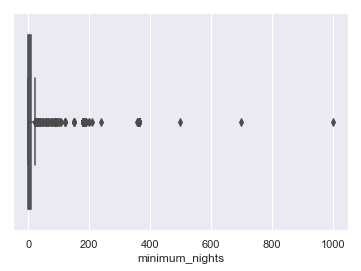

In [51]:
sns.boxplot(x = raw_data['minimum_nights'])

# Data Cleaning

Remove outliers from dataset

In [52]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquantile Range
    fence_low = q1-1.5*iqr #formula to find the outlier on the left end
    fence_high = q3+1.5*iqr #formula to find the outlier on the right end
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [53]:
data_remove_1 = remove_outlier(raw_data, 'minimum_nights')
data_remove_2 = remove_outlier(data_remove_1, 'price')

### Let's see the result

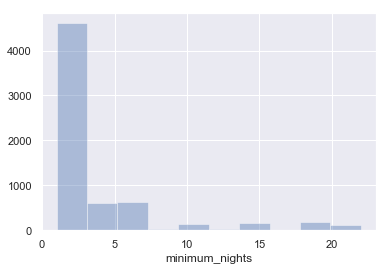

In [54]:
sns.distplot(data_remove_1['minimum_nights'], bins = 10, kde=False)

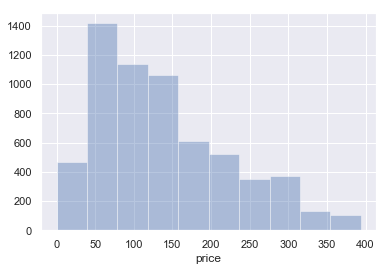

In [55]:
sns.distplot(data_remove_2['price'], bins = 10 ,kde = False)

## Analyze

### Analyze the average price of each region in Singapore

In [56]:
price_data = data_remove_2[['neighbourhood_group','price']]

In [57]:
price_data['neighbourhood_group'].value_counts()

Central Region       4947
West Region           417
East Region           393
North-East Region     257
North Region          154
Name: neighbourhood_group, dtype: int64

In [58]:
grouped_price_data = price_data.groupby('neighbourhood_group')['price'].mean()
price_data.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Central Region       146.034769
East Region          109.931298
North Region          95.675325
North-East Region     88.642023
West Region          103.057554
Name: price, dtype: float64

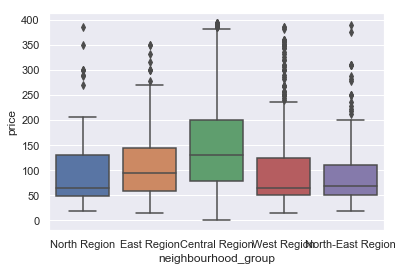

In [59]:
sns.boxplot(x = 'neighbourhood_group', y = 'price', data = price_data)

In [72]:
price_data['price'].mean()

137.18012321660183

In [119]:
import folium
from folium.plugins import HeatMap

airbnb_map = folium.Map(location = [1.35, 103.84], zoom_start = 11)
HeatMap(data_remove_2[["latitude","longitude"]], radius = 8, gradient= {0.2:"blue", 0.65:"yellow", 1.0:"red"}).add_to(airbnb_map)
airbnb_map

### Analyze the region with more regular customers per month

In [70]:
regularity_data = data_remove_2[['neighbourhood_group','reviews_per_month']]

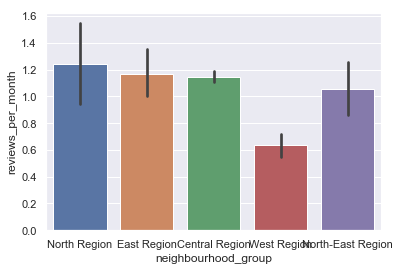

In [71]:
sns.barplot(x = 'neighbourhood_group', y = 'reviews_per_month', data = regularity_data)

## Conclusion

The Central Regions seems to have highest price of all regions. 

However, North region's competitive prices have attracted more regular customers on monthly basis than other regions.